### Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

##### CRIM: Per capita crime rate by town
##### ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
##### INDUS: Proportion of non-retail business acres per town
##### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
##### NOX: Nitric oxide concentration (parts per 10 million)
##### RM: Average number of rooms per dwelling
##### AGE: Proportion of owner-occupied units built prior to 1940
##### DIS: Weighted distances to five Boston employment centers
##### RAD: Index of accessibility to radial highways
##### TAX: Full-value property tax rate per USD 10,000
##### PTRATIO: Pupil-teacher ratio by town
##### B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
##### LSTAT: Percentage of lower status of the population
##### MEDV: Median value of owner-occupied homes in USD 1000s

In [4]:
df['MEDV']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
len(boston.feature_names)

13

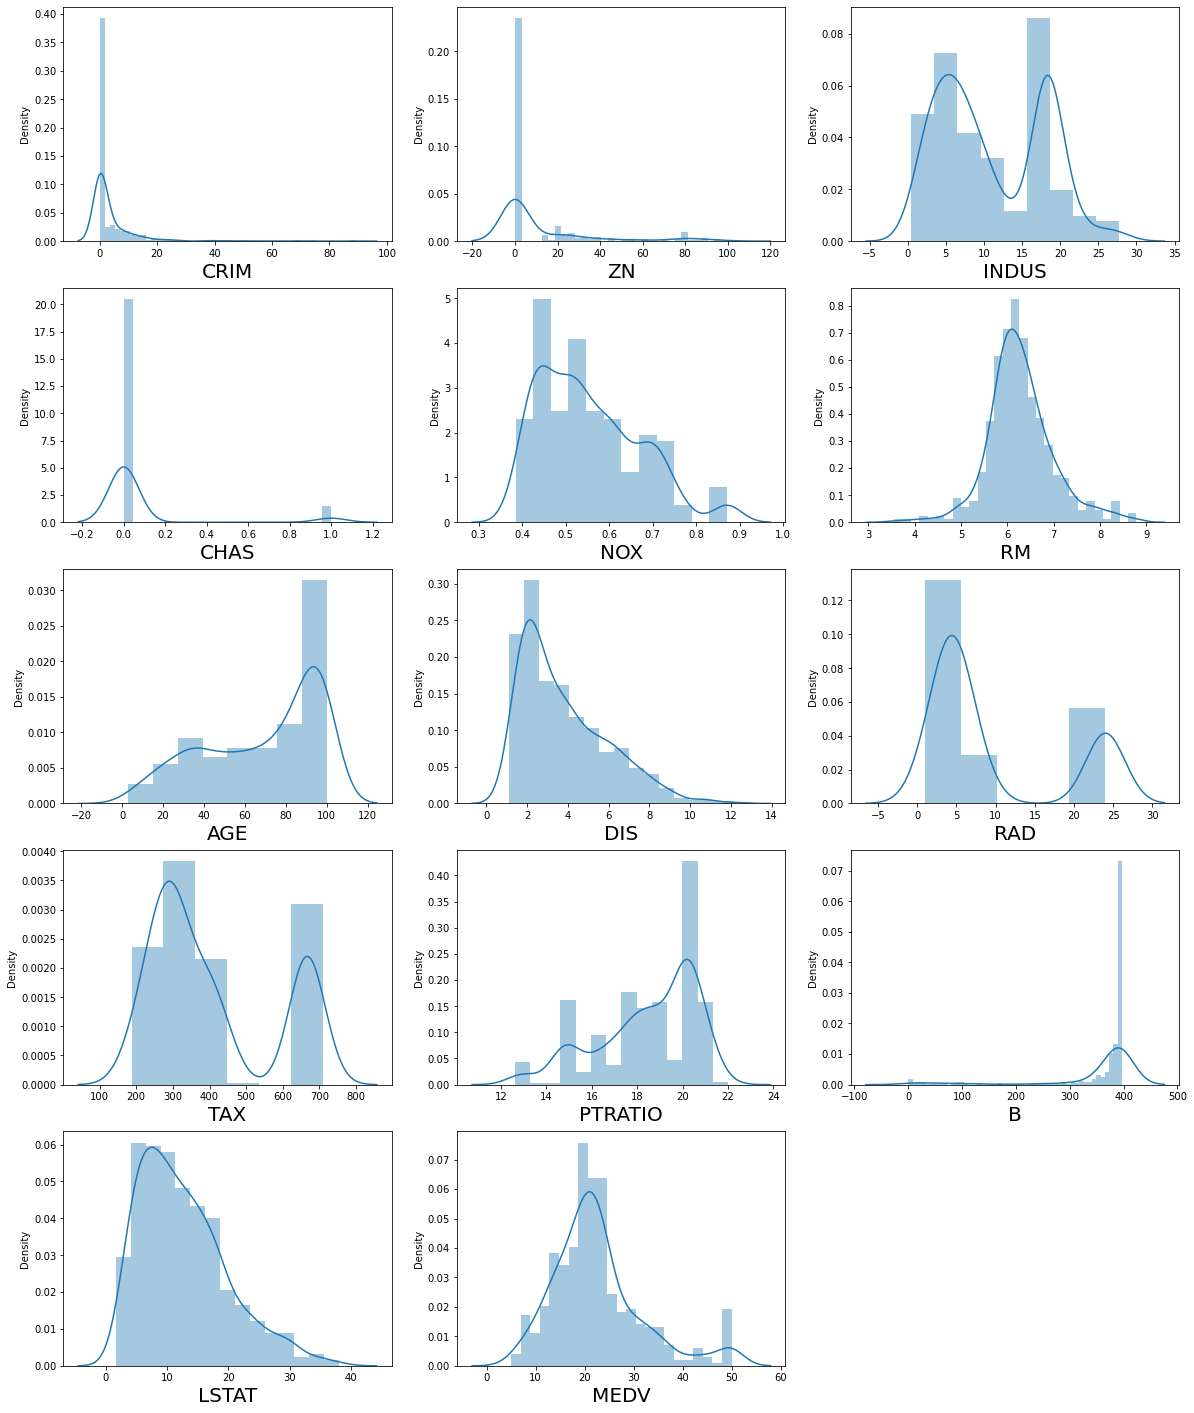

In [8]:
j = 1
plt.figure(figsize=(20,25), facecolor='white')
for i in df:
    ax = plt.subplot(5,3,j)
    sns.distplot(df[i])
    plt.xlabel(i,fontsize=20)
    j+=1
plt.show()

In [9]:
#k = 1
#plt.figure(figsize=(20,25), facecolor='white')
#for i in df:
#    ax=plt.subplot(5,3,k)
#    sns.displot(df[i])
#    plt.xlabel(i,fontsize=20)
#    k+=1
#plt.show()

In [10]:
y = df['MEDV']
x =df.drop(columns = ['MEDV'])

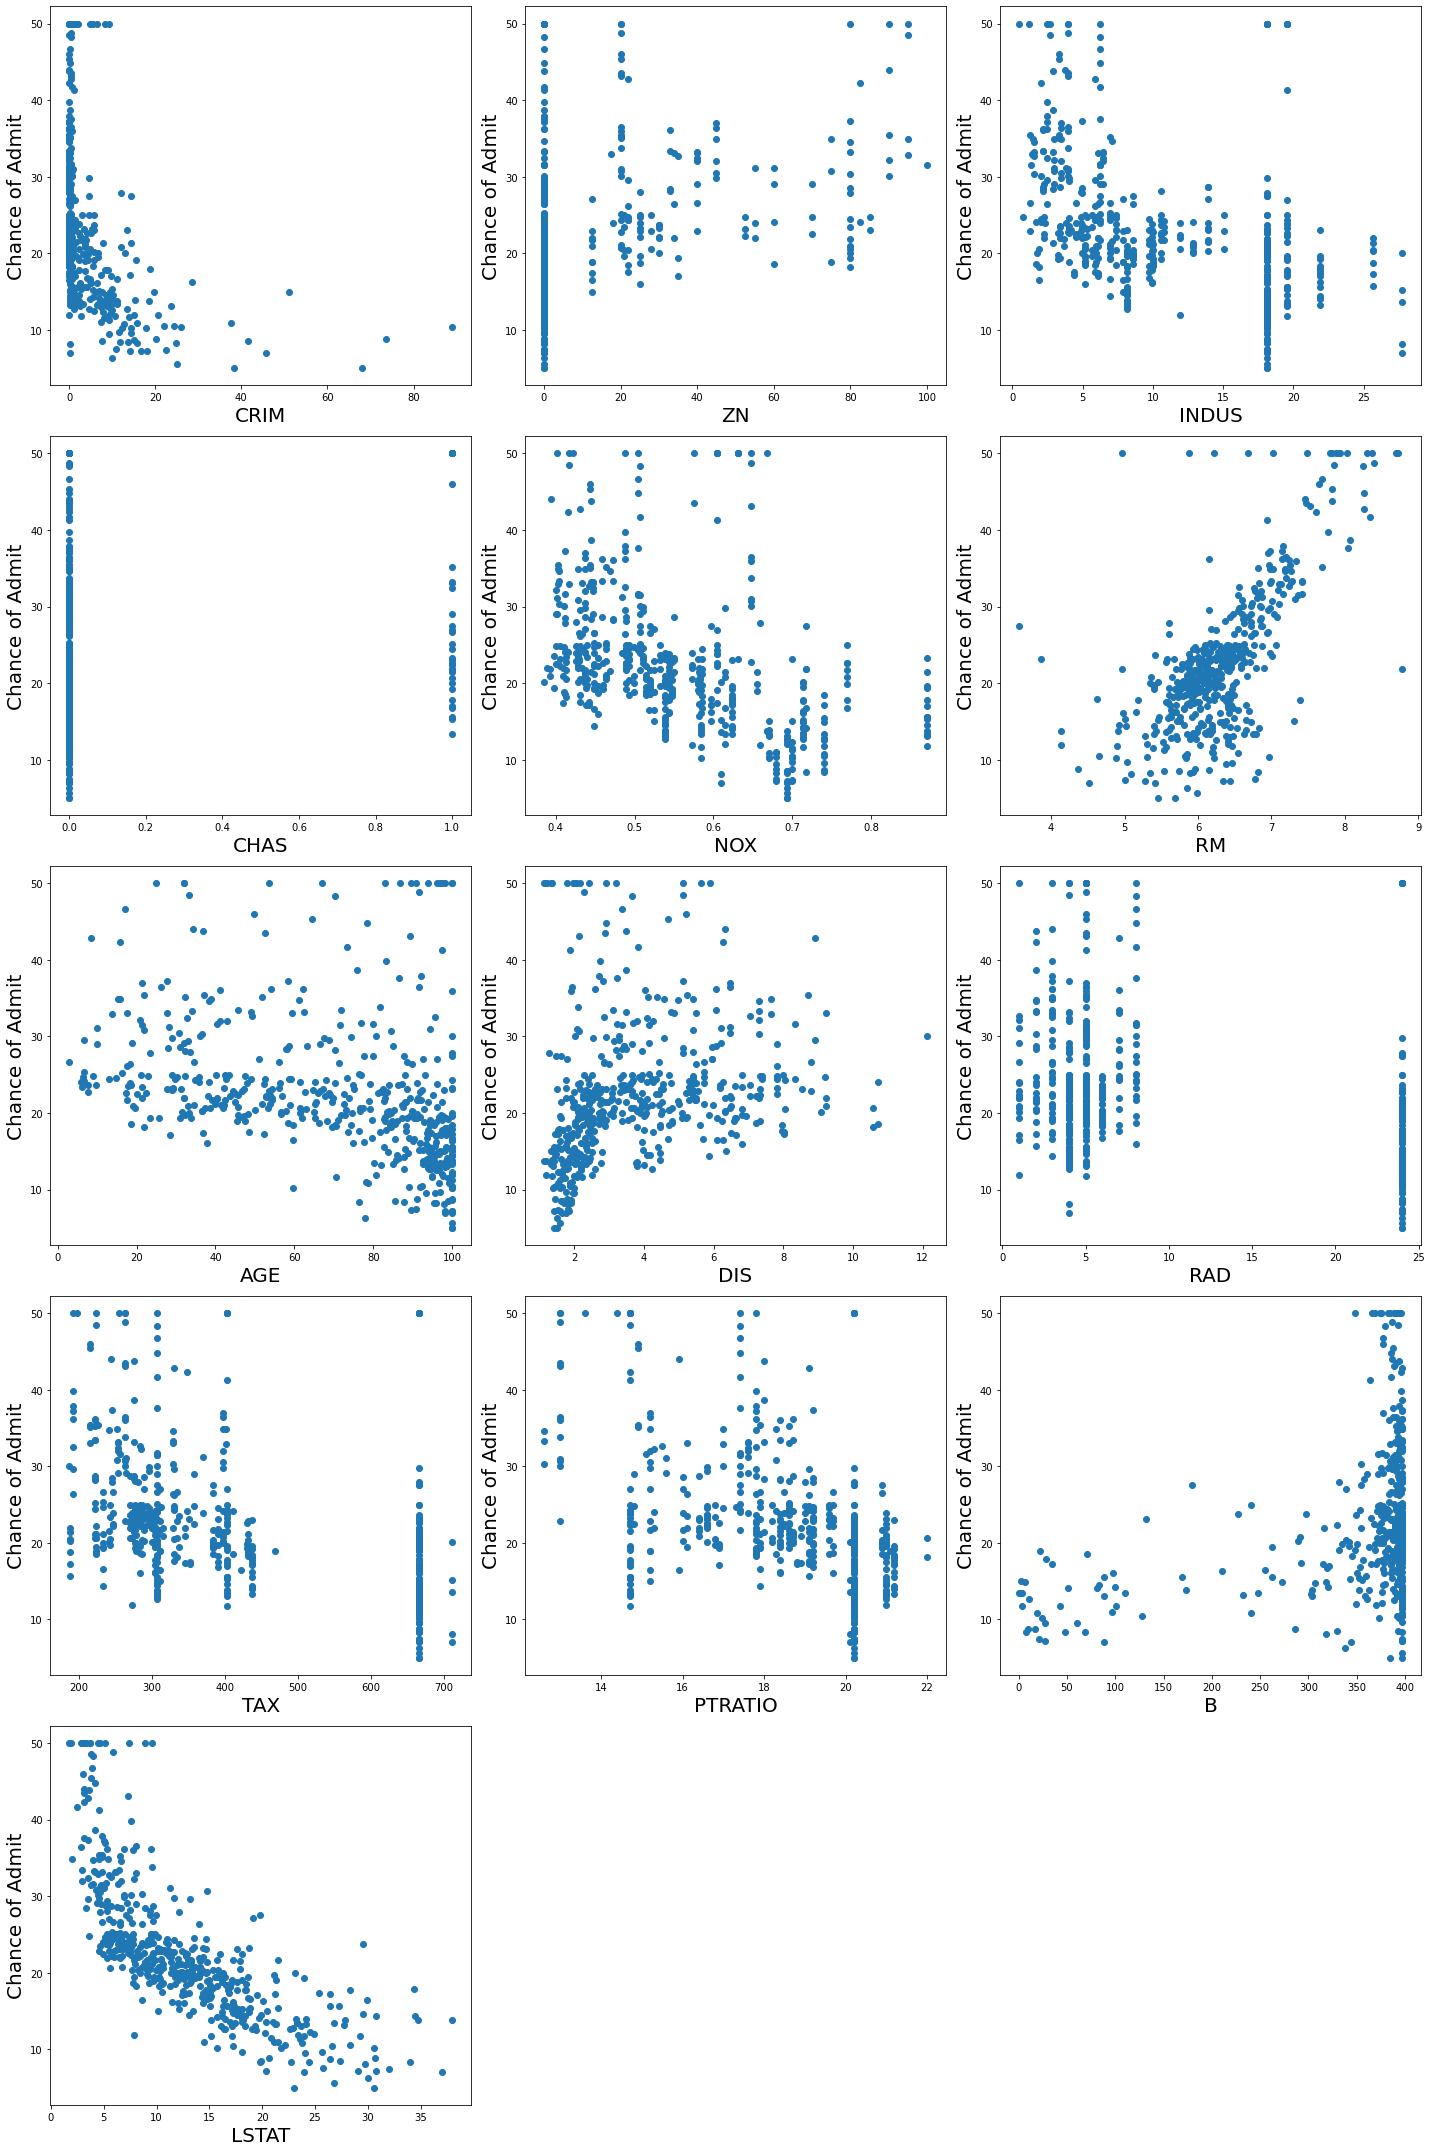

In [11]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=len(boston.feature_names) :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

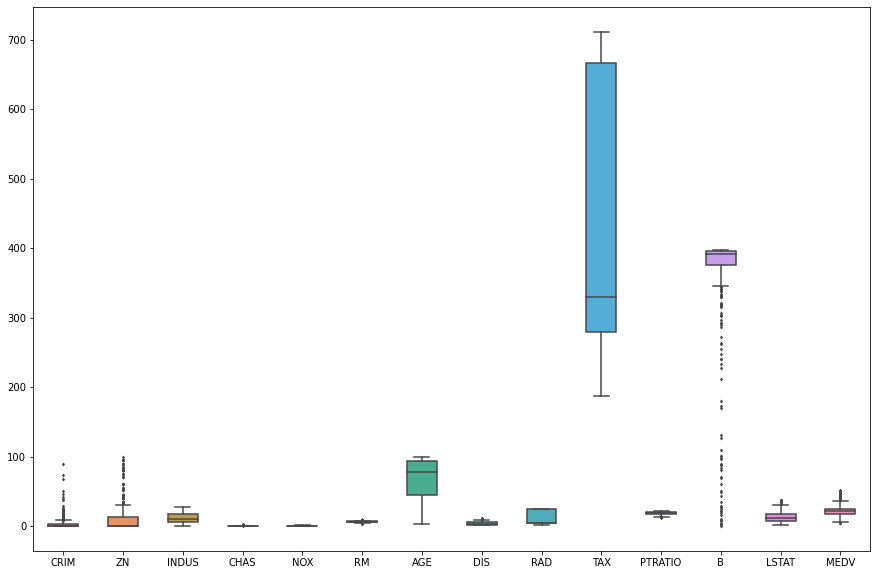

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=2)

### SOME OF THE FEATURES (CRIM, ZN AND B) IN DATA HAVING OUTLIERS SO, LET'S REMOVE THE OUTLIERS

In [13]:
#All other features are skewed
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
#CRIM have outliers and it is skewed

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.CRIM.quantile(0.75)-df.CRIM.quantile(0.25)

lower_bridge=df['CRIM'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['CRIM'].quantile(0.25)+(IQR*1.5)
print(upper_bridge), print(lower_bridge)

5.47460125
-5.31051125


(None, None)

<AxesSubplot:>

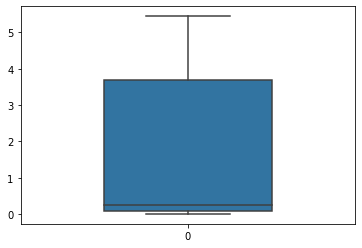

In [15]:
df1=df.copy()
df1.loc[df1['CRIM']>=5.475,'CRIM']=5
sns.boxplot(data=df1.CRIM, width= 0.5,  fliersize=2)
#all the outliers have been removed

<AxesSubplot:>

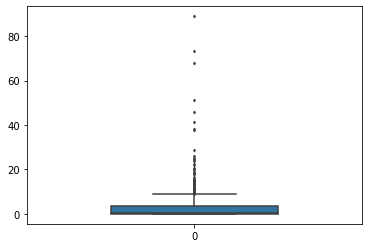

In [16]:
sns.boxplot(data=df.CRIM, width= 0.5,  fliersize=2)

In [17]:
#ZN have outliers and it is skewed

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.ZN.quantile(0.75)-df.ZN.quantile(0.25)

lower_bridge=df['ZN'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['ZN'].quantile(0.75)+(IQR*1.5)
print(upper_bridge), print(lower_bridge)

18.75
-18.75


(None, None)

<AxesSubplot:>

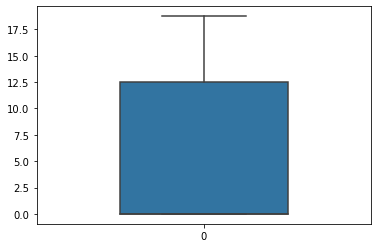

In [18]:
df1.loc[df1['ZN']>=18.75,'ZN']=18.75
sns.boxplot(data=df1.ZN, width= 0.5,  fliersize=2)
#all the outliers have been removed

<AxesSubplot:>

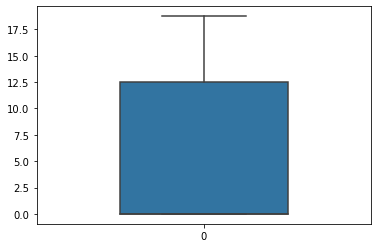

In [19]:
sns.boxplot(data=df1.ZN, width= 0.5,  fliersize=2)

In [20]:
#DIS have outliers and it is skewed

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.DIS.quantile(0.75)-df.DIS.quantile(0.25)

lower_bridge=df['DIS'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['DIS'].quantile(0.75)+(IQR*1.5)
print(upper_bridge), print(lower_bridge)

6.732550000000001
-2.5322000000000005


(None, None)

<AxesSubplot:>

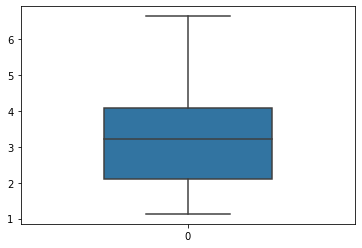

In [21]:
df1.loc[df1['DIS']>=6.73,'DIS']=3.73
sns.boxplot(data=df1.DIS, width= 0.5,  fliersize=2)
#all the outliers have been removed

In [22]:
#B have outliers and it is skewed

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.B.quantile(0.75)-df.B.quantile(0.25)

lower_bridge=df['B'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['B'].quantile(0.75)+(IQR*1.5)
print(upper_bridge), print(lower_bridge)

406.64875000000006
344.10624999999993


(None, None)

<AxesSubplot:>

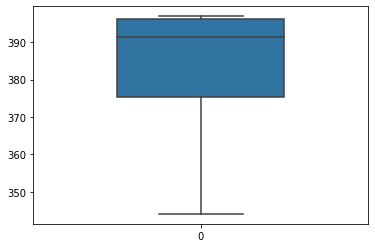

In [23]:
df1.loc[df1['B']<=344.11,'B']=344.11
sns.boxplot(data=df1.B, width= 0.5,  fliersize=2)
#all the outliers have been removed

In [24]:
#LSTAT have outliers and it is skewed

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.LSTAT.quantile(0.75)-df.LSTAT.quantile(0.25)

lower_bridge=df['LSTAT'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['LSTAT'].quantile(0.75)+(IQR*1.5)
print(upper_bridge), print(lower_bridge)

21.957500000000003
-8.057500000000005


(None, None)

<AxesSubplot:>

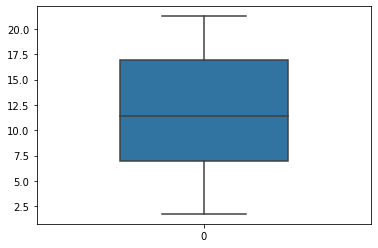

In [25]:
df1.loc[df1['LSTAT']>21.26,'LSTAT']=21.26
sns.boxplot(data=df1.LSTAT, width= 0.5,  fliersize=2)
#all the outliers have been removed

In [26]:
#MEDV have outliers and it is skewed

#### Lets calculate the boundaries
lower_boundary=df.MEDV.mean()-3*df.MEDV.std()
upper_boundary=df.MEDV.mean()+3*df.MEDV.std()
print(lower_boundary), print(upper_boundary), print(df.MEDV.mean())

-5.0585059380287625
50.12411858625016
22.532806324110698


(None, None, None)

In [27]:
#MEDV have outliers and it is skewed

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.MEDV.quantile(0.75)-df.MEDV.quantile(0.25)

lower_bridge=df['MEDV'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['MEDV'].quantile(0.25)+(IQR*1.5)
print(upper_bridge), print(lower_bridge)

28.9875
5.0624999999999964


(None, None)

<AxesSubplot:>

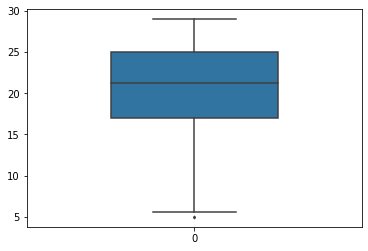

In [28]:
df1.loc[df1['MEDV']>28.98,'MEDV']=28.98
sns.boxplot(data=df1.MEDV, width= 0.5,  fliersize=2)

<AxesSubplot:>

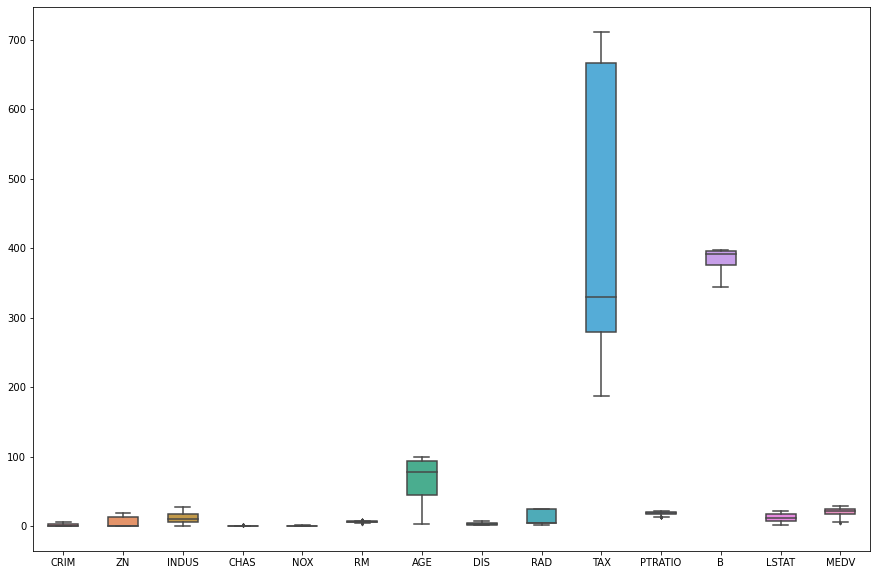

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df1, width= 0.5,ax=ax,  fliersize=2)
#all the outliers have been removed

In [30]:
df1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.542937,4.837945,11.136779,0.069170,0.554695,6.284634,68.574901,3.320202,9.549407,408.237154,18.455534,381.919407,11.985909,20.894111
std,2.037408,8.113073,6.860353,0.253994,0.115878,0.702617,28.148861,1.430667,8.707259,168.537116,2.164946,19.053778,5.775012,6.013947
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,344.110000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,4.094025,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,5.441140,18.750000,27.740000,1.000000,0.871000,8.780000,100.000000,6.640700,24.000000,711.000000,22.000000,396.900000,21.260000,28.980000


Great!! Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. Let's use the standard scaler for that.



In [31]:
scalar=StandardScaler()

In [32]:
X=df1.drop(columns=['MEDV'])
Y=df1['MEDV']
X_scaled = scalar.fit_transform(X)
scaled_features=pd.DataFrame(X_scaled, columns=boston.feature_names)
scaled_features
#This is how our data looks now after scaling. 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.754948,1.623932,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.538602,-0.982843,-0.666608,-1.459000,0.787005,-1.214342
1,-0.744636,-0.596905,-0.593381,-0.272599,-0.740262,0.194274,0.367166,1.152280,-0.867883,-0.987329,-0.303094,0.787005,-0.493285
2,-0.744645,-0.596905,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,1.152280,-0.867883,-0.987329,-0.303094,0.573188,-1.379007
3,-0.742150,-0.596905,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.918484,-0.752922,-1.106115,0.113032,0.667751,-1.567938
4,-0.724129,-0.596905,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.918484,-0.752922,-1.106115,0.113032,0.787005,-1.153677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.727283,-0.596905,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.588841,-0.982843,-0.803212,1.176466,0.529058,-0.401419
502,-0.735812,-0.596905,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.722547,-0.982843,-0.803212,1.176466,0.787005,-0.503685
503,-0.728201,-0.596905,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.806507,-0.982843,-0.803212,1.176466,0.787005,-1.099944
504,-0.704211,-0.596905,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.651601,-0.982843,-0.803212,1.176466,0.605759,-0.954346


In [33]:
df2=pd.concat([scaled_features, Y], axis=1)
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.754948,1.623932,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.538602,-0.982843,-0.666608,-1.459000,0.787005,-1.214342,24.00
1,-0.744636,-0.596905,-0.593381,-0.272599,-0.740262,0.194274,0.367166,1.152280,-0.867883,-0.987329,-0.303094,0.787005,-0.493285,21.60
2,-0.744645,-0.596905,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,1.152280,-0.867883,-0.987329,-0.303094,0.573188,-1.379007,28.98
3,-0.742150,-0.596905,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.918484,-0.752922,-1.106115,0.113032,0.667751,-1.567938,28.98
4,-0.724129,-0.596905,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.918484,-0.752922,-1.106115,0.113032,0.787005,-1.153677,28.98


In [34]:
#Great, now we will check for multicollinearity using VIF(Variance Inflation factor)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,17.948681,CRIM
1,1.994350,ZN
2,3.918882,INDUS
3,1.069920,CHAS
4,4.863270,NOX
5,1.816485,RM
6,3.248441,AGE
7,2.811742,DIS
8,17.833387,RAD
9,8.608567,TAX


In [35]:
(X_scaled.shape[1])

13

In [36]:
#As we can see RAD and CRIM have VIF factor more than 5 (even more than 10). So, now we have to remove one of these features and
#this removal is also depending upon what business people working in company think.
#scaled_features=scaled_features.drop(columns=['CRIM', 'RAD'])
#scaled_features

In [37]:
#But before that we will the rsquared and adj_rsquared values before and after removing these features

In [38]:
lm = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df2).fit()
lm.conf_int()

,0,1
Intercept,20.646428,21.141793
CRIM,-2.881385,-0.782726
ZN,-0.694304,0.005258
INDUS,-0.032335,0.948299
CHAS,0.125674,0.638065
NOX,-1.554974,-0.462554
RM,0.264695,0.932334
AGE,-0.362467,0.530352
DIS,-1.162440,-0.331798
RAD,1.637078,3.728986


In [39]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sun, 23 May 2021   Prob (F-statistic):          5.18e-154
Time:                        15:04:52   Log-Likelihood:                -1238.3
No. Observations:                 506   AIC:                             2505.
Df Residuals:                     492   BIC:                             2564.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8941      0.126    165.747      0.000      20.646      21.142
CRIM          -1.8321      0.534     -3.430      0.001      -2.881      -0.783
ZN            -0.3445      0.178     -1.935      0.054      -0.694       0.005
INDUS          0.4580      0.250      1.835      0.067      -0.032       0.948
CHAS           0.3819      0.130      2.929      0.004       0.126       0.638
NOX           -1.0088      0.278     -3.629      0.000      -1.555      -0.463
RM             0.5985      0.170      3.523      0.000       0.265       0.932
AGE            0.0839      0.227      0.369      0.712      -0.362       0.530
DIS           -0.7471      0.211     -3.534      0.000      -1.162      -0.332
RAD            2.6830      0.532      5.040      0.000       1.637       3.729
TAX           -1.7044      0.370     -4.608      0.000      -2.431      -0.978
PTRATIO       -1.3067      0.177     -7.394      0.000      -1.654      -0.959
B              0.2027      0.148      1.373      0.170      -0.087       0.493
LSTAT         -3.6551      0.222    -16.449      0.000      -4.092      -3.219
==============================================================================
Omnibus:                       32.825   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.053
Skew:                           0.366   Prob(JB):                     6.14e-16
Kurtosis:                       4.670   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
lm = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + TAX + PTRATIO + B + LSTAT', data=df2).fit()
lm.conf_int()

,0,1
Intercept,20.640374,21.147848
CRIM,-0.374639,0.950253
ZN,-0.646810,0.068487
INDUS,-0.319083,0.658807
CHAS,0.179556,0.702346
NOX,-1.738562,-0.628161
RM,0.359041,1.038305
AGE,-0.402887,0.511448
DIS,-1.148333,-0.297606
TAX,-1.487716,-0.172646


In [41]:
lm.summary()
#as we can see after removing RAD, R-squared and R-squared both are decreased. So, we will not remove these features

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     139.3
Date:                Sun, 23 May 2021   Prob (F-statistic):          9.48e-150
Time:                        15:04:52   Log-Likelihood:                -1251.0
No. Observations:                 506   AIC:                             2528.
Df Residuals:                     493   BIC:                             2583.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8941      0.129    161.791      0.000      20.640      21.148
CRIM           0.2878      0.337      0.854      0.394      -0.375       0.950
ZN            -0.2892      0.182     -1.589      0.113      -0.647       0.068
INDUS          0.1699      0.249      0.683      0.495      -0.319       0.659
CHAS           0.4410      0.133      3.314      0.001       0.180       0.702
NOX           -1.1834      0.283     -4.188      0.000      -1.739      -0.628
RM             0.6987      0.173      4.042      0.000       0.359       1.038
AGE            0.0543      0.233      0.233      0.816      -0.403       0.511
DIS           -0.7230      0.216     -3.339      0.001      -1.148      -0.298
TAX           -0.8302      0.335     -2.481      0.013      -1.488      -0.173
PTRATIO       -1.0775      0.175     -6.159      0.000      -1.421      -0.734
B              0.2807      0.150      1.866      0.063      -0.015       0.576
LSTAT         -3.6734      0.228    -16.139      0.000      -4.121      -3.226
==============================================================================
Omnibus:                       34.800   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.735
Skew:                           0.397   Prob(JB):                     1.61e-16
Kurtosis:                       4.679   Cond. No.                         8.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Now all the VIF values are less than 5 and are very low. 
#That means no multicollinearity. Now, we can go ahead with fitting our data to the model. 
#Before that, let's split our data in test and training set.

x_train, x_test, y_train, y_test=train_test_split(scaled_features,Y, test_size= 0.25, random_state = 355)

In [43]:
scaled_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.754948,1.623932,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.538602,-0.982843,-0.666608,-1.459000,0.787005,-1.214342
1,-0.744636,-0.596905,-0.593381,-0.272599,-0.740262,0.194274,0.367166,1.152280,-0.867883,-0.987329,-0.303094,0.787005,-0.493285
2,-0.744645,-0.596905,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,1.152280,-0.867883,-0.987329,-0.303094,0.573188,-1.379007
3,-0.742150,-0.596905,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.918484,-0.752922,-1.106115,0.113032,0.667751,-1.567938
4,-0.724129,-0.596905,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.918484,-0.752922,-1.106115,0.113032,0.787005,-1.153677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.727283,-0.596905,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.588841,-0.982843,-0.803212,1.176466,0.529058,-0.401419
502,-0.735812,-0.596905,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.722547,-0.982843,-0.803212,1.176466,0.787005,-0.503685
503,-0.728201,-0.596905,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.806507,-0.982843,-0.803212,1.176466,0.787005,-1.099944
504,-0.704211,-0.596905,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.651601,-0.982843,-0.803212,1.176466,0.605759,-0.954346


In [44]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [45]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [46]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scalar.transform([[-0.754948, 1.623932, -1.287909, -0.272599, -0.144217, 0.413672, -0.120013, 0.538602, -0.982843, -0.666608, -1.459000, 0.787005, -1.214342]]))
a

array([39.99848666])

In [47]:
regression.score(x_train,y_train)

0.778976378683565

In [48]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [49]:
adj_r2(x_train,y_train)

0.7711043044996919

In [50]:
regression.score(x_test,y_test)

0.7875846355096132

In [51]:
adj_r2(x_test,y_test)

0.7631474696832855

In [52]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [53]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0004154792048060613

In [54]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0004154792048060613)

In [55]:
lasso_reg.score(x_test, y_test)

0.7875637685891668

our r2_score for test data (78.75%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [56]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([1.49097493, 3.35456706, 5.66324235, 1.44511924, 1.25721079,
       8.93382871, 0.3046343 , 3.7333039 , 3.95203612, 7.81494729,
       9.15575573, 5.02340675, 0.0182579 , 0.39590704, 5.20692096,
       4.79662271, 2.94011782, 4.58362189, 0.17462254, 9.57062829,
       8.00412736, 8.69836838, 5.62871286, 2.3686047 , 9.26487821,
       5.84156363, 2.73275106, 3.44100259, 6.48516555, 5.38499917,
       4.74981166, 8.67577811, 5.76246923, 8.23456737, 0.7610281 ,
       4.30689487, 6.80651814, 6.22294598, 7.94090104, 0.48369878,
       3.28061372, 2.23290511, 2.76063066, 5.73277134, 5.99604454,
       2.66275339, 6.2970893 , 7.64891939, 2.66636148, 0.08066053]),
        cv=10, normalize=True)

In [57]:
ridgecv.alpha_

0.01825789847337056

In [58]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.01825789847337056)

In [59]:
ridge_model.score(x_test, y_test)

0.7875807949710139

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [60]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [61]:
elasticCV.alpha_

0.009872813754173062

In [62]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [63]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.009872813754173062)

In [64]:
elasticnet_reg.score(x_test, y_test)

0.7862229585666409

So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.